# Example: build a Wulff cluster of Ru Cystal in *hcp* structure

* Python packages ```wulffpack``` and ```ase``` should be install.
* Crystal structure and surface energy for different facets can be found from [Materials Project](https://next-gen.materialsproject.org/)

## build Wulff construction

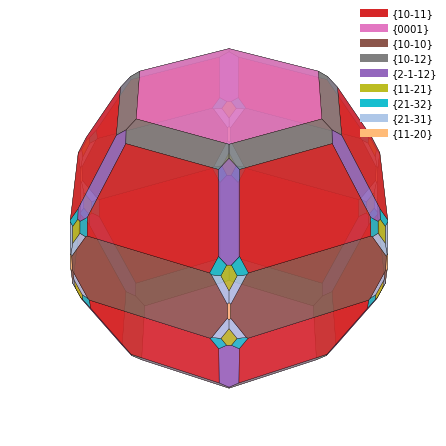

In [10]:
from ase.build import bulk
from wulffpack import SingleCrystal

prim = bulk('Ru', crystalstructure='hcp',a=2.73,b=2.73,c=4.31)

surface_energies = {(1,  0, -1, 1): 2.877,
                    (0,  0,  0, 1): 2.598,
                    (1,  0, -1, 0): 2.906,
                    (1,  0, -1, 2): 3.047,
                    (2, -1, -1, 2): 3.111,
                    (1,  1, -2, 1): 3.257,
                    (2,  1, -3, 2): 3.187,
                    (2,  1, -3, 1): 3.245,
                    (1,  1, -2, 0):	3.337}
particle = SingleCrystal(surface_energies,
                         primitive_structure=prim,
                         natoms=1000) # natoms: number of atoms in the clsuter
particle.view()

## visulize Wulff cluster

In [13]:
import nglview as nv
import numpy as np
view = nv.show_ase(particle.atoms)
view.camera = 'orthographic'
view.clear_representations()
view.add_representation(repr_type='ball+stick',radius='.8')
view.add_unitcell()
view.control.spin([1,0,0],-np.pi/2.)
view

NGLWidget()

In [14]:
view.render_image(factor=8,antialias=True,trim=True,transparent=True)

Image(value=b'', width='99%')

![image.png](./images/crystal_cluster.png)

## save xyz file

In [15]:
from ase.io import write
write('wulff_cluster.xyz', particle.atoms)